# Lab 6: Unsupervised Learning II - Dimensionality Reduction

In this lab, we will cover the following topics:
1. Dimensionality reduction techniques:
   * PCA
   * t-SNE
   * UMAP
2. Visualization and interpretation

Each section includes basic implementation and questions for further exploration.

## 1. Dimensionality Reduction

### 1.1 Principal Component Analysis (PCA)

We will start by implementing PCA for dimensionality reduction. We will also explore different parameters and visualize the results.

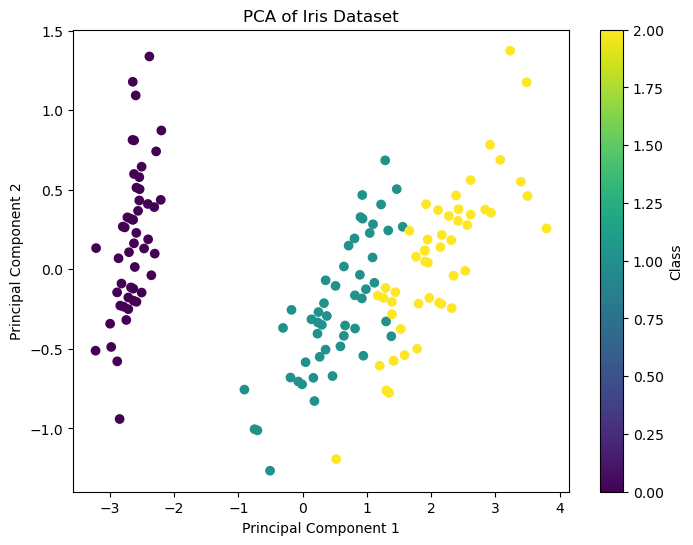

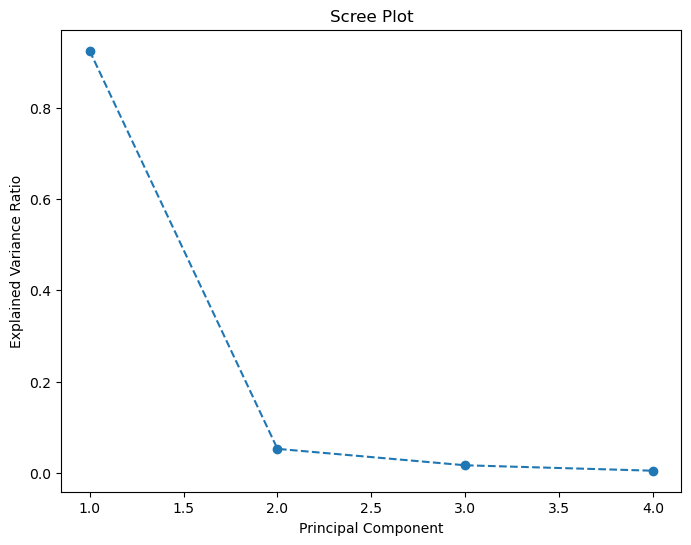

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data # Stores the feature matrix (sepal length, sepal width, petal length, petal width in x axis
y = iris.target # stores the class labells in the y axis


# Perform PCA
pca = PCA(n_components=4) # PCA1, PCA2
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # c is colour and painted by y which is class labels.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

# Scree plot
# Helps decide how many PCs to keep (sharp drop indicates optimal number).
explained_variance = pca.explained_variance_ratio_  #Stores the proportion of variance explained by each PCA
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

### Questions for Exploration

1. How does changing the number of principal components (`n_components`) affect the explained variance ratio?
The variance drops when it reaches the 
2. What happens to the visualization when you use more or fewer principal components?
No changes observed in the plot results
3. How does the choice of dataset affect the PCA results and their interpretation?
Having large dataset reduces the readability of the indivisual points

### 1.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

Next, we will implement t-SNE for dimensionality reduction. We will also explore different parameters and visualize the results.

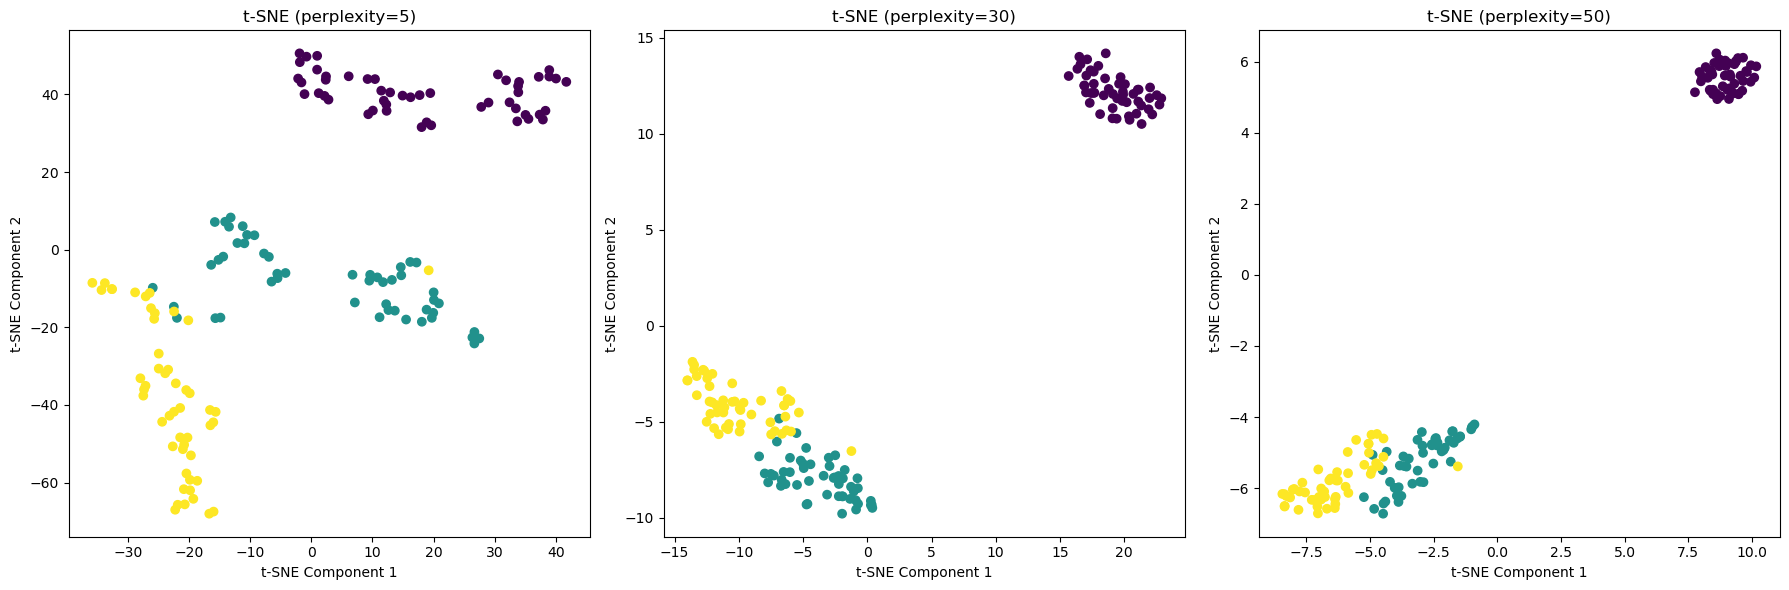

In [27]:
from sklearn.manifold import TSNE

# Perform t-SNE with different perplexity values
# perplexities is a key hyperparameter in t-SNE that roughly determines the number of neighbors considered for each point.
#low perplexity focus on local distributaion (closest neighbours), large perplexity captures large neighbourhood.
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, len(perplexities), figsize=(18, 6))

#Iterates over each perplexity value (5, 30, 50).

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=100, random_state=42)
    X_tsne = tsne.fit_transform(X)
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f't-SNE (perplexity={perplexity})')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

# "dimension" in t-SNE refers to the number of components (n_components) in the output space where the data is projected.
plt.tight_layout()
plt.show()


### Questions for Exploration

1. How does changing the perplexity parameter affect the t-SNE visualization?
depending on the parameter the distance between each points within the clusture and between the clusture differs.
2. What happens to the visualization when you change the learning rate?
upon increasing the learning-rate the points within the clustures overlaps.
3. How does the choice of dataset affect the t-SNE results and their interpretation?
t-SNE depends mainly on the pperplexity to capture the data points. Large number of datapoints can create noise.


### 1.3 Uniform Manifold Approximation and Projection (UMAP)

Finally, we will implement UMAP for dimensionality reduction. We will also explore different parameters and visualize the results.

/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/li

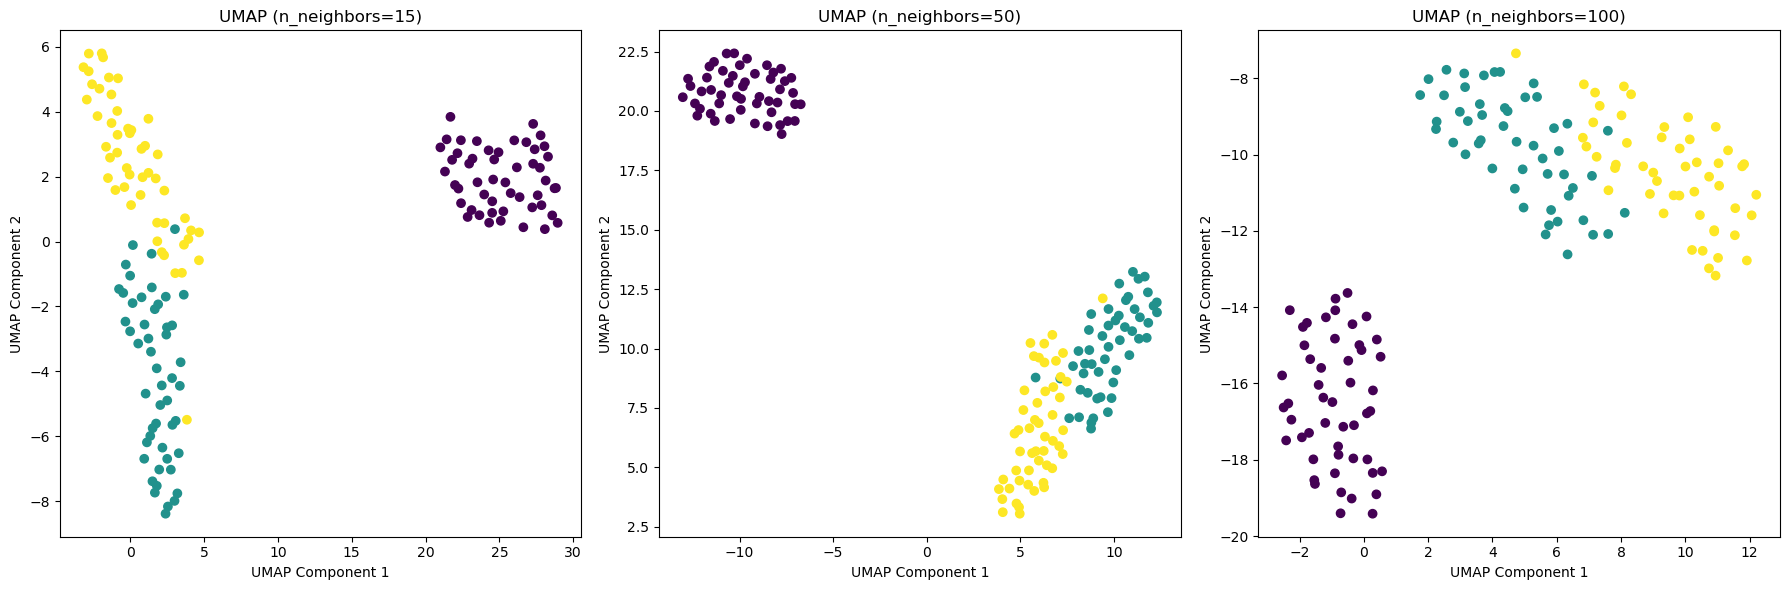

In [30]:
import umap

# Perform UMAP with different n_neighbors values  [5, 15, 50]
n_neighbors_values = [15,50,100]
fig, axes = plt.subplots(1, len(n_neighbors_values), figsize=(18, 6))

for i, n_neighbors in enumerate(n_neighbors_values):
    umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist= 1,random_state=42)
    X_umap = umap_reducer.fit_transform(X)
    axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'UMAP (n_neighbors={n_neighbors})')
    axes[i].set_xlabel('UMAP Component 1')
    axes[i].set_ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How does changing the number of neighbors (`n_neighbors`) affect the UMAP visualization?
The points within the clutre gets very closer when increasing the n_neighbours
2. What happens to the visualization when you change the minimum distance (`min_dist`)?
when increasing the minimum distance the points get more scattered 
3. How does the choice of dataset affect the UMAP results and their interpretation?



## 2. Visualization and Interpretation

We will visualize and interpret the results of different dimensionality reduction techniques. We will also explore different visualization techniques.

/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


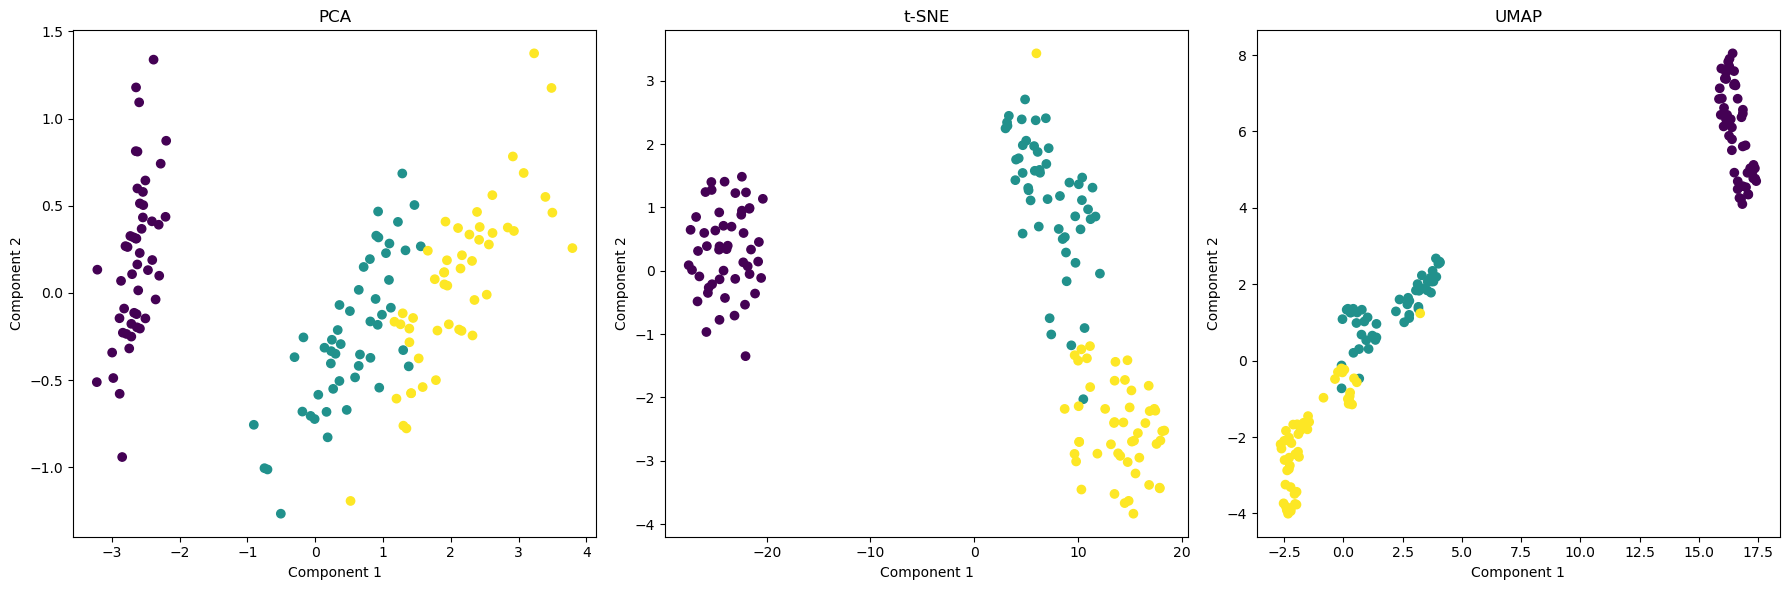

In [6]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[0].set_title('PCA')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
axes[1].set_title('t-SNE')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
axes[2].set_title('UMAP')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How do the visualizations of PCA, t-SNE, and UMAP compare?

2. What are the strengths and weaknesses of each dimensionality reduction technique?


3. How does the choice of parameters affect the visualization and interpretation of each technique?


## Extensions

1. Apply clustering algorithms (e.g., k-Means) on the reduced dimensions obtained from PCA, t-SNE, and UMAP.
    * How do the clustering results compare when using different dimensionality reduction techniques?
2. Use quantitative metrics (e.g., trustworthiness, continuity) to evaluate the quality of the dimensionality reduction.
    * How do PCA, t-SNE, and UMAP compare based on these metrics?
Handling High-Dimensional Data
3. Use PCA to reduce noise in a dataset by retaining only the top principal components.
    * How does this noise reduction affect the performance of downstream tasks (e.g., classification, clustering)?
4. Explore other dimensionality reduction techniques such as Independent Component Analysis (ICA), Linear Discriminant Analysis (LDA), and Isomap.
    * How do these techniques compare to PCA, t-SNE, and UMAP in terms of visualization and interpretation?

In [ ]:
from sklearn.impute import KNNImputer
"""
RNA-seq data processing pipelines:
1. Load the RNA seq data
2.


"""


rna_seq = pd.read_csv("tpm_counts.csv")